In [115]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt  # major lib for smoothening
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from  matplotlib import pyplot

In [125]:
np.seterr(divide = 'ignore') 


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

def parser(x):
    return pd.datetime.strptime('190'+x,'%Y-%m')

dataset = pd.read_csv('C:/Mine/3rd Year/5th Semester/Data Analytics/Assignments/DEOK_hourly.csv',date_parser=dateparse)


0        7.987864
1        7.961370
2        7.941651
3        7.941651
4        7.958577
5        7.991931
6        8.030084
7        8.065265
8        8.068403
9        8.091321
10       8.104099
11       8.106515
12       8.095599
13       8.084254
14       8.081475
15       8.087025
16       8.088562
17       8.141190
18       8.155936
19       8.119101
20       8.083946
21       8.046870
22       7.999679
23       7.964156
24       7.990238
25       7.947325
26       7.933438
27       7.923348
28       7.932362
29       7.946971
           ...   
57709    8.418919
57710    8.422003
57711    8.416710
57712    8.398410
57713    8.361241
57714    8.323608
57715    8.241703
57716    8.237479
57717    8.230844
57718    8.229778
57719    8.240121
57720    8.254269
57721    8.272826
57722    8.292549
57723    8.288534
57724    8.281471
57725    8.274867
57726    8.273081
57727    8.259717
57728    8.249052
57729    8.233769
57730    8.236421
57731    8.264878
57732    8.342840
57733    8

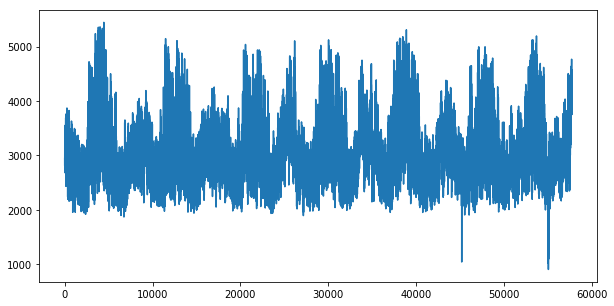

In [122]:
ds = dataset['DEOK_MW']
ds.head()


ds.plot(kind="line",figsize=(10,5))
my_data=dataset['DEOK_MW']

my_data = np.log(ds)
print(my_data)

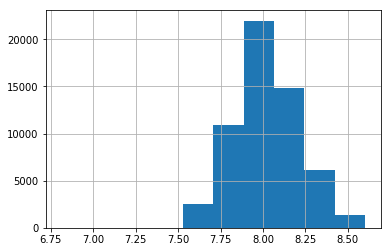

In [123]:
my_data.hist()

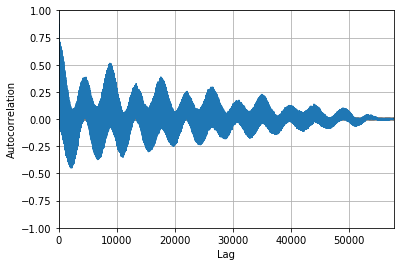

In [129]:
dataset1 = pd.read_csv('C:/Mine/3rd Year/5th Semester/Data Analytics/Assignments/DEOK_hourly.csv')
#data = pd.read_csv('DEOK_hourly.csv')
dataset1['Datetime']=pd.to_datetime(dataset1['Datetime'])
dataset1.set_index('Datetime', inplace=True)
#print(dataset1)
autocorrelation_plot(dataset1)
pyplot.show()

In [21]:
one, two, three = np.split(
        dataset['DEOK_MW'].sample(
        frac=1), [int(.25*len(dataset['DEOK_MW'])),
        int(.75*len(dataset['DEOK_MW']))])

In [23]:
mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print(mean1, mean2, mean3)
print(var1, var2, var3)

3108.0933906055147 3103.5272601316246 3105.238240387946
364532.75272704806 355252.5126622443 364322.1996460645


In [30]:
adf_test = adfuller(dataset['DEOK_MW'])
 
print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))

ADF = -14.913267801069862
p-value = 1.4477674072052024e-27


In [31]:
from statsmodels.tsa.arima_model import ARMA

# 1,2 ARMA Model
model = ARMA(my_data, order=(2,5))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                DEOK_MW   No. Observations:                57739
Model:                     ARMA(2, 5)   Log Likelihood              109627.510
Method:                       css-mle   S.D. of innovations              0.036
Date:                Thu, 24 Oct 2019   AIC                        -219237.021
Time:                        08:57:59   BIC                        -219156.347
Sample:                             0   HQIC                       -219211.918
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0228      0.003   3024.977      0.000       8.018       8.028
ar.L1.DEOK_MW     1.5041      0.010    144.607      0.000       1.484       1.525
ar.L2.DEOK_MW    -0.5889      0.009    -

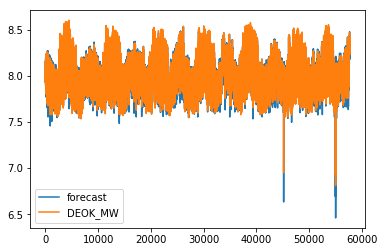

In [12]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [150]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
# train = my_data[:2500]
# test = my_data[2500:]

X = dataset['DEOK_MW'].dropna()
 
train= X[1:250]
test = X[251:500]

In [157]:
model = ARMA(train, order=(2,8))  
fitted = model.fit(disp=-1)

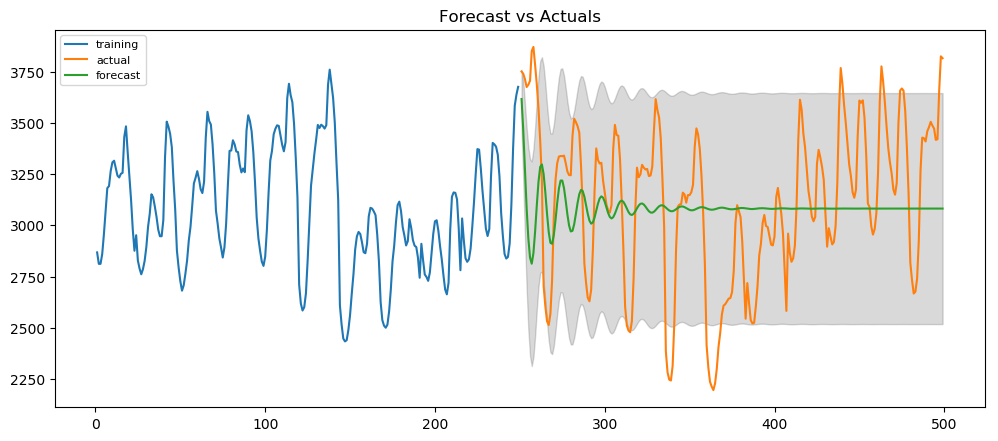

In [158]:
fc, se, conf = fitted.forecast(249, alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
